# Importando bibliotecas importantes

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

import keras
import numpy as np

In [2]:
%matplotlib notebook 
import matplotlib.pyplot as plt

### Bibliotecas pessoais

In [3]:
from dataHandler import dataHandler

# Carregando dados

In [31]:
data = dataHandler()
data.loadData()

### Codificando labels via One Hot Encoding

In [32]:
data.oneHotEncode()

In [33]:
print("- Foram detectadas %d classes diferentes" % data.getClassCount())

- Foram detectadas 26 classes diferentes


### Obtendo dados
Os dados de treino e teste são divididos durante o carregamento

In [34]:
train_features, test_features = data.getFeatures()
train_labels, test_labels = data.getLabels()

### Visualizando dados

In [35]:
print(train_labels[0])
print(train_labels[1])

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
print(train_features[0][1000:1500])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 9, 0, 0, 9, 0, 6, 2, 0, 0, 0, 10, 7, 0, 6, 4, 0, 0, 13, 0, 0, 1, 0, 2, 0, 10, 0, 3, 12, 0, 11, 0, 5, 0, 2, 0, 0, 0, 3, 0, 0, 5, 10, 0, 0, 0, 0, 6, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 16, 0, 3, 0, 16, 0, 0, 6, 7, 0, 17, 11, 0, 0, 10, 73, 157, 205, 218, 240, 255, 239, 189, 166, 55, 0, 3, 0, 11, 0, 0, 12, 41, 107, 175, 213, 241, 255, 243, 216, 168, 83, 0, 0, 12, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 122, 248, 255, 255, 241, 244, 255, 255, 241, 242, 255, 120, 0, 75, 176, 250, 255, 237, 249, 255, 255, 240, 237, 255, 238, 255, 194, 28, 2, 0, 12, 109, 193, 255, 254, 255, 245, 251, 242, 255, 248, 253, 255, 202, 68, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 7, 124, 254, 254, 255, 255, 255, 239, 255, 255, 254, 235, 199, 185, 239, 120, 39, 10, 80, 255, 255, 244, 255, 255, 233, 249, 255, 255, 207, 15, 105, 227, 188, 78, 14, 29, 187, 255, 251, 255, 232, 255, 255, 236, 255, 2

In [36]:
print("- Tamanho do conjunto de treino: %d" % len(train_features))
print("- Tamanho do conjunto de teste: %d" % len(test_features))

- Tamanho do conjunto de treino: 2028
- Tamanho do conjunto de teste: 624


# Criando rede neural

In [37]:
inputShape = len(train_features[0])
numClasses = data.getClassCount()

print("- Tamanho linear dos dados de entrada: %d" % inputShape)

- Tamanho linear dos dados de entrada: 4096


In [38]:
model = keras.Sequential()
model.add(keras.layers.Dense(2400, input_dim=inputShape, activation='selu'))
model.add(keras.layers.Dropout(0.8))
model.add(keras.layers.normalization.BatchNormalization())

model.add(keras.layers.Dense(1800, input_dim=inputShape, activation='selu'))
model.add(keras.layers.normalization.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(800, input_dim=inputShape, activation='selu'))
model.add(keras.layers.normalization.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(numClasses, activation="softmax"))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2400)              9832800   
_________________________________________________________________
dropout_3 (Dropout)          (None, 2400)              0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 2400)              9600      
_________________________________________________________________
dense_5 (Dense)              (None, 1800)              4321800   
_________________________________________________________________
batch_normalization_4 (Batch (None, 1800)              7200      
_________________________________________________________________
dropout_4 (Dropout)          (None, 1800)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 800)              

## Compilando modelo

In [40]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinando modelo

In [69]:
history = model.fit(train_features, train_labels, epochs=50, batch_size=64, validation_data=(test_features, test_labels))

Epoch 1/50
32/32 [==============================] - 9s 292ms/step - loss: 0.4763 - accuracy: 0.8388 - val_loss: 7.2534 - val_accuracy: 0.5497
Epoch 2/50
32/32 [==============================] - 1s 42ms/step - loss: 0.4664 - accuracy: 0.8363 - val_loss: 7.1560 - val_accuracy: 0.5401
Epoch 3/50
32/32 [==============================] - 1s 44ms/step - loss: 0.4284 - accuracy: 0.8595 - val_loss: 7.2831 - val_accuracy: 0.5529
Epoch 4/50
32/32 [==============================] - 1s 43ms/step - loss: 0.4482 - accuracy: 0.8560 - val_loss: 7.1405 - val_accuracy: 0.5561
Epoch 5/50
32/32 [==============================] - 1s 42ms/step - loss: 0.4248 - accuracy: 0.8570 - val_loss: 7.1978 - val_accuracy: 0.5705
Epoch 6/50
32/32 [==============================] - 1s 44ms/step - loss: 0.4354 - accuracy: 0.8481 - val_loss: 7.2212 - val_accuracy: 0.5497
Epoch 7/50
32/32 [==============================] - 1s 44ms/step - loss: 0.4083 - accuracy: 0.8654 - val_loss: 7.3927 - val_accuracy: 0.5641
Epoch 8/50
3

<IPython.core.display.Javascript object>


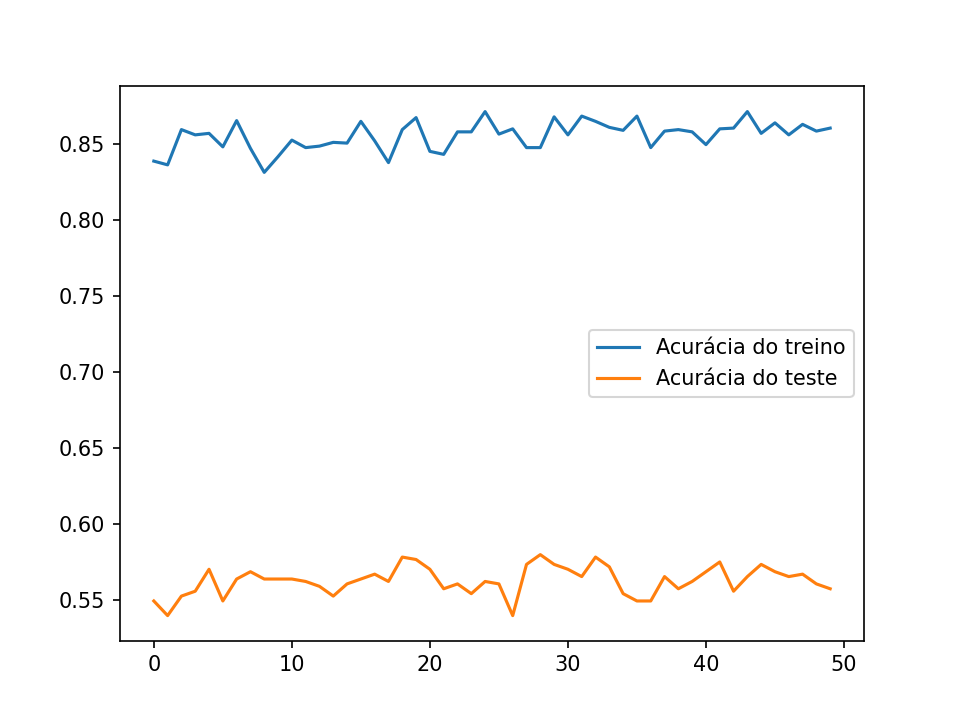

In [70]:
plt.figure()
plt.plot(history.history['accuracy'], label="Acurácia do treino")
plt.plot(history.history['val_accuracy'], label = "Acurácia do teste")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


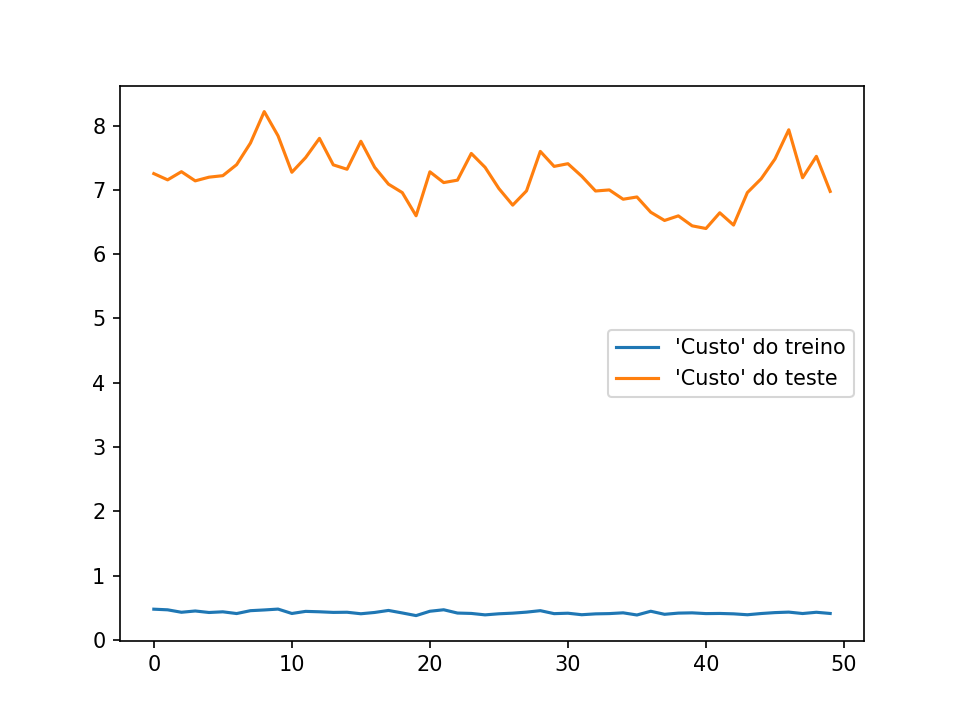

In [71]:
plt.figure()
plt.plot(history.history['loss'], label = "'Custo' do treino")
plt.plot(history.history['val_loss'], label= "'Custo' do teste")
plt.legend()
plt.show()

# Avaliando modelo

In [107]:
_, accuracy = model.evaluate(test_features, test_labels)
print("Acurácia do modelo nos dados de teste: %.2f%%" % (accuracy*100.0))

27/27 [==============================] - 0s 9ms/step - loss: 7.1882 - accuracy: 0.4738
Acurácia do modelo nos dados de teste: 47.38%


# Testando modelo

In [44]:
import cv2

# Função para carregar imagem
def loadImage(fileName, printImg = False):
    # Carrega a imagem e aplica um threshold para ficar igual
    # as imagens do treino
    img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 

    # Ajusta o tamanho da imagem
    img = cv2.resize(img, (64,64))
    
    if printImg:
        plt.figure()
        plt.imshow(img, cmap='gray')
    
    return list(img.flatten().tolist())


def getChar(x):
    label = model.predict([x], batch_size=1)
    
    char = data.oneHotDecode(label)
    
    return char

In [64]:
x = loadImage("testes/letraa.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi t


In [65]:
x = loadImage("testes/letraa2.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi a


In [66]:
x = loadImage("testes/letraAu.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi t


In [67]:
x = loadImage("testes/cidilha.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi t


In [68]:
x = loadImage("testes/cidilhau.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi t
